In [2]:
!pip install konlpy

     |████████████████████████████████| 19.4MB 1.8MB/s 
     |████████████████████████████████| 2.7MB 27.5MB/s 


In [7]:
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> all
       | 
       | Downloading package abc to /root/nltk_data...
       |   Unzipping corpora/abc.zip.
       | Downloading package alpino to /root/nltk_data...
       |   Unzipping corpora/alpino.zip.
       | Downloading package biocreative_ppi to /root/nltk_data...
       |   Unzipping corpora/biocreative_ppi.zip.
       | Downloading package brown to /root/nltk_data...
       |   Unzipping corpora/brown.zip.
       | Downloading package brown_tei to /root/nltk_data...
       |   Unzipping corpora/brown_tei.zip.
       | Downloading package cess_cat to /root/nltk_data...
       |   Unzipping corpora/cess_cat.zip.
       | Downloading package cess_esp to /root/nltk_data...
 

True

In [0]:
from nltk.corpus import *
from nltk.stem import *
from konlpy.tag import Kkma
from nltk.tokenize import *
from nltk.tag import *
import nltk
from keras.utils import to_categorical
import numpy as np
from keras import *
from keras.datasets import mnist
from collections import Counter
import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from nltk import FreqDist
from konlpy.tag import Okt
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
from tensorflow import keras

# 자연어 처리

In [5]:
from nltk.corpus import *
from nltk.stem import *
from konlpy.tag import Kkma
from nltk.tokenize import *
from nltk.tag import *
import nltk
from keras.utils import to_categorical
import numpy as np
from keras import *
from keras.datasets import mnist
from collections import Counter
import tensorflow as tf

text="Python is an interpreted, high-level, general-purpose programming language. Created by Guido van Rossum and first released in 1991, Python's design philosophy emphasizes code readability with its notable use of significant whitespace. Its language constructs and object-oriented approach aim to help programmers write clear, logical code for small and large-scale projects.[27] Python is dynamically typed and garbage-collected. It supports multiple programming paradigms, including procedural, object-oriented, and functional programming. Python is often described as a 'batteries included' language due to its comprehensive standard library.[28]"
text=sent_tokenize(text)
text

['Python is an interpreted, high-level, general-purpose programming language.',
 "Created by Guido van Rossum and first released in 1991, Python's design philosophy emphasizes code readability with its notable use of significant whitespace.",
 'Its language constructs and object-oriented approach aim to help programmers write clear, logical code for small and large-scale projects.',
 '[27] Python is dynamically typed and garbage-collected.',
 'It supports multiple programming paradigms, including procedural, object-oriented, and functional programming.',
 "Python is often described as a 'batteries included' language due to its comprehensive standard library.",
 '[28]']

In [8]:
voc=Counter()
sentences = []
stop_words = stopwords.words('english')
for i in text:
    sentence=word_tokenize(i)
    res = []
    for word in sentence: 
        word=word.lower()
        if word not in stop_words: 
            if len(word) > 2:
                res.append(word)
                voc[word]=voc[word]+1
    sentences.append(res) 
print(sentences)

[['python', 'interpreted', 'high-level', 'general-purpose', 'programming', 'language'], ['created', 'guido', 'van', 'rossum', 'first', 'released', '1991', 'python', 'design', 'philosophy', 'emphasizes', 'code', 'readability', 'notable', 'use', 'significant', 'whitespace'], ['language', 'constructs', 'object-oriented', 'approach', 'aim', 'help', 'programmers', 'write', 'clear', 'logical', 'code', 'small', 'large-scale', 'projects'], ['python', 'dynamically', 'typed', 'garbage-collected'], ['supports', 'multiple', 'programming', 'paradigms', 'including', 'procedural', 'object-oriented', 'functional', 'programming'], ['python', 'often', 'described', "'batteries", 'included', 'language', 'due', 'comprehensive', 'standard', 'library'], []]


In [9]:
voc

Counter({"'batteries": 1,
         '1991': 1,
         'aim': 1,
         'approach': 1,
         'clear': 1,
         'code': 2,
         'comprehensive': 1,
         'constructs': 1,
         'created': 1,
         'described': 1,
         'design': 1,
         'due': 1,
         'dynamically': 1,
         'emphasizes': 1,
         'first': 1,
         'functional': 1,
         'garbage-collected': 1,
         'general-purpose': 1,
         'guido': 1,
         'help': 1,
         'high-level': 1,
         'included': 1,
         'including': 1,
         'interpreted': 1,
         'language': 3,
         'large-scale': 1,
         'library': 1,
         'logical': 1,
         'multiple': 1,
         'notable': 1,
         'object-oriented': 2,
         'often': 1,
         'paradigms': 1,
         'philosophy': 1,
         'procedural': 1,
         'programmers': 1,
         'programming': 3,
         'projects': 1,
         'python': 4,
         'readability': 1,
         'released'

In [10]:
voc.items()

dict_items([('python', 4), ('interpreted', 1), ('high-level', 1), ('general-purpose', 1), ('programming', 3), ('language', 3), ('created', 1), ('guido', 1), ('van', 1), ('rossum', 1), ('first', 1), ('released', 1), ('1991', 1), ('design', 1), ('philosophy', 1), ('emphasizes', 1), ('code', 2), ('readability', 1), ('notable', 1), ('use', 1), ('significant', 1), ('whitespace', 1), ('constructs', 1), ('object-oriented', 2), ('approach', 1), ('aim', 1), ('help', 1), ('programmers', 1), ('write', 1), ('clear', 1), ('logical', 1), ('small', 1), ('large-scale', 1), ('projects', 1), ('dynamically', 1), ('typed', 1), ('garbage-collected', 1), ('supports', 1), ('multiple', 1), ('paradigms', 1), ('including', 1), ('procedural', 1), ('functional', 1), ('often', 1), ('described', 1), ("'batteries", 1), ('included', 1), ('due', 1), ('comprehensive', 1), ('standard', 1), ('library', 1)])

In [15]:
voc_sorted = sorted(voc.items(), key=lambda a:a[1], reverse=True)
voc_sorted

[('python', 4),
 ('programming', 3),
 ('language', 3),
 ('code', 2),
 ('object-oriented', 2),
 ('interpreted', 1),
 ('high-level', 1),
 ('general-purpose', 1),
 ('created', 1),
 ('guido', 1),
 ('van', 1),
 ('rossum', 1),
 ('first', 1),
 ('released', 1),
 ('1991', 1),
 ('design', 1),
 ('philosophy', 1),
 ('emphasizes', 1),
 ('readability', 1),
 ('notable', 1),
 ('use', 1),
 ('significant', 1),
 ('whitespace', 1),
 ('constructs', 1),
 ('approach', 1),
 ('aim', 1),
 ('help', 1),
 ('programmers', 1),
 ('write', 1),
 ('clear', 1),
 ('logical', 1),
 ('small', 1),
 ('large-scale', 1),
 ('projects', 1),
 ('dynamically', 1),
 ('typed', 1),
 ('garbage-collected', 1),
 ('supports', 1),
 ('multiple', 1),
 ('paradigms', 1),
 ('including', 1),
 ('procedural', 1),
 ('functional', 1),
 ('often', 1),
 ('described', 1),
 ("'batteries", 1),
 ('included', 1),
 ('due', 1),
 ('comprehensive', 1),
 ('standard', 1),
 ('library', 1)]

In [16]:
# voc_sorted에서 빈도수가 2번 이상 언급된 것만 추출해 res에 넣기

res = {}

i = 0
for (w, f) in voc_sorted:
  if f > 1:
    i += 1
    res[w] = i    # 번호는 그냥 인덱스로서 집어넣음
print(res)

{'python': 1, 'programming': 2, 'language': 3, 'code': 4, 'object-oriented': 5}


# Keras에서 문자열 처리

In [0]:
from keras.preprocessing.text import Tokenizer

tok = Tokenizer()
tok.fit_on_texts(text)

In [34]:
print(tok.word_index)    # 정렬(빈도수) -> 인덱싱

{'and': 1, 'python': 2, 'is': 3, 'programming': 4, 'language': 5, 'its': 6, 'code': 7, 'object': 8, 'oriented': 9, 'to': 10, 'an': 11, 'interpreted': 12, 'high': 13, 'level': 14, 'general': 15, 'purpose': 16, 'created': 17, 'by': 18, 'guido': 19, 'van': 20, 'rossum': 21, 'first': 22, 'released': 23, 'in': 24, '1991': 25, "python's": 26, 'design': 27, 'philosophy': 28, 'emphasizes': 29, 'readability': 30, 'with': 31, 'notable': 32, 'use': 33, 'of': 34, 'significant': 35, 'whitespace': 36, 'constructs': 37, 'approach': 38, 'aim': 39, 'help': 40, 'programmers': 41, 'write': 42, 'clear': 43, 'logical': 44, 'for': 45, 'small': 46, 'large': 47, 'scale': 48, 'projects': 49, '27': 50, 'dynamically': 51, 'typed': 52, 'garbage': 53, 'collected': 54, 'it': 55, 'supports': 56, 'multiple': 57, 'paradigms': 58, 'including': 59, 'procedural': 60, 'functional': 61, 'often': 62, 'described': 63, 'as': 64, 'a': 65, "'batteries": 66, "included'": 67, 'due': 68, 'comprehensive': 69, 'standard': 70, 'libra

In [35]:
print(tok.word_counts)    # 정렬(빈도수)

OrderedDict([('python', 3), ('is', 3), ('an', 1), ('interpreted', 1), ('high', 1), ('level', 1), ('general', 1), ('purpose', 1), ('programming', 3), ('language', 3), ('created', 1), ('by', 1), ('guido', 1), ('van', 1), ('rossum', 1), ('and', 5), ('first', 1), ('released', 1), ('in', 1), ('1991', 1), ("python's", 1), ('design', 1), ('philosophy', 1), ('emphasizes', 1), ('code', 2), ('readability', 1), ('with', 1), ('its', 3), ('notable', 1), ('use', 1), ('of', 1), ('significant', 1), ('whitespace', 1), ('constructs', 1), ('object', 2), ('oriented', 2), ('approach', 1), ('aim', 1), ('to', 2), ('help', 1), ('programmers', 1), ('write', 1), ('clear', 1), ('logical', 1), ('for', 1), ('small', 1), ('large', 1), ('scale', 1), ('projects', 1), ('27', 1), ('dynamically', 1), ('typed', 1), ('garbage', 1), ('collected', 1), ('it', 1), ('supports', 1), ('multiple', 1), ('paradigms', 1), ('including', 1), ('procedural', 1), ('functional', 1), ('often', 1), ('described', 1), ('as', 1), ('a', 1), ("'

In [36]:
print(tok.texts_to_sequences(text))    # .word_index에서 index들을 원문장의 단어 순서대로 출력

[[2, 3, 11, 12, 13, 14, 15, 16, 4, 5], [17, 18, 19, 20, 21, 1, 22, 23, 24, 25, 26, 27, 28, 29, 7, 30, 31, 6, 32, 33, 34, 35, 36], [6, 5, 37, 1, 8, 9, 38, 39, 10, 40, 41, 42, 43, 44, 7, 45, 46, 1, 47, 48, 49], [50, 2, 3, 51, 52, 1, 53, 54], [55, 56, 57, 4, 58, 59, 60, 8, 9, 1, 61, 4], [2, 3, 62, 63, 64, 65, 66, 67, 5, 68, 10, 6, 69, 70, 71], [72]]


In [37]:
tok.word_counts

OrderedDict([('python', 3),
             ('is', 3),
             ('an', 1),
             ('interpreted', 1),
             ('high', 1),
             ('level', 1),
             ('general', 1),
             ('purpose', 1),
             ('programming', 3),
             ('language', 3),
             ('created', 1),
             ('by', 1),
             ('guido', 1),
             ('van', 1),
             ('rossum', 1),
             ('and', 5),
             ('first', 1),
             ('released', 1),
             ('in', 1),
             ('1991', 1),
             ("python's", 1),
             ('design', 1),
             ('philosophy', 1),
             ('emphasizes', 1),
             ('code', 2),
             ('readability', 1),
             ('with', 1),
             ('its', 3),
             ('notable', 1),
             ('use', 1),
             ('of', 1),
             ('significant', 1),
             ('whitespace', 1),
             ('constructs', 1),
             ('object', 2),
             ('or

In [38]:
# tok.word_counts에서 빈도수가 2보다 작은 단어들을 저장

words_freq = [w for w, f in tok.word_counts.items() if f < 2]
words_freq

['an',
 'interpreted',
 'high',
 'level',
 'general',
 'purpose',
 'created',
 'by',
 'guido',
 'van',
 'rossum',
 'first',
 'released',
 'in',
 '1991',
 "python's",
 'design',
 'philosophy',
 'emphasizes',
 'readability',
 'with',
 'notable',
 'use',
 'of',
 'significant',
 'whitespace',
 'constructs',
 'approach',
 'aim',
 'help',
 'programmers',
 'write',
 'clear',
 'logical',
 'for',
 'small',
 'large',
 'scale',
 'projects',
 '27',
 'dynamically',
 'typed',
 'garbage',
 'collected',
 'it',
 'supports',
 'multiple',
 'paradigms',
 'including',
 'procedural',
 'functional',
 'often',
 'described',
 'as',
 'a',
 "'batteries",
 "included'",
 'due',
 'comprehensive',
 'standard',
 'library',
 '28']

In [39]:
for w in words_freq:
#   print(tok.word_index[w])    # 각 단어 인덱스
#   print(tok.word_counts[w])    # 각 단어 빈도수
  del tok.word_index[w]
  del tok.word_counts[w]
print(tok.texts_to_sequences(text))
print("=" * 50)
print(tok.word_index)

[[2, 3, 4, 5], [1, 7, 6], [6, 5, 1, 8, 9, 10, 7, 1], [2, 3, 1], [4, 8, 9, 1, 4], [2, 3, 5, 10, 6], []]
{'and': 1, 'python': 2, 'is': 3, 'programming': 4, 'language': 5, 'its': 6, 'code': 7, 'object': 8, 'oriented': 9, 'to': 10}


In [41]:
words = ["java", "python", "ds", "ds", "java", "java"]
from nltk import FreqDist
fd = FreqDist(words)
fd.N()

6

In [42]:
fd.freq("java")    # 빈도가 확률로 나온다

0.5

In [44]:
fd

FreqDist({'ds': 2, 'java': 3, 'python': 1})

In [45]:
fd["ds"]

2

In [47]:
fd.most_common(2)    # 가장 많이 등장한 단어 상위 2개 출력

[('java', 3), ('ds', 2)]

# one-hot 인코딩

In [48]:
from konlpy.tag import Okt
okt = Okt()

/usr/local/lib/python3.6/dist-packages/jpype/_core.py:210: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)


In [50]:
tok = okt.morphs("나는 자연어 자연어 처리를 공부하고 있습니다")
tok

['나', '는', '자연어', '자연어', '처리', '를', '공부', '하고', '있습니다']

In [51]:
word2idx={}    # 각 단어와 그 단어의 인덱스를 각각 키와 밸류로 넣으려고 한다

for t in tok:
  if t not in word2idx.keys():
    word2idx[t] = len(word2idx)    # value 값에 인덱스 번호 지정 (word2idx가 계속 늘어나니까 i+=1의 효과를 준다)
print(word2idx)

{'나': 0, '는': 1, '자연어': 2, '처리': 3, '를': 4, '공부': 5, '하고': 6, '있습니다': 7}


In [55]:
# 원핫인코딩

def ohe(w, word2idx):
  ohv = [0] * len(word2idx)
  p = word2idx[w]    # 원하는 단어의 index number
  ohv[p] = 1
  return ohv
  
print(ohe("공부", word2idx))

[0, 0, 0, 0, 0, 1, 0, 0]


# keras 원핫인코딩

In [0]:
text = "오늘 메뉴는 뼈다귀 해장국입니다. 맛있게 먹어요. 국산이래요. 뼈다귀 최고 뼈다귀 최고."

In [61]:
from keras.preprocessing.text import Tokenizer
tok = Tokenizer()
tok.fit_on_texts([text])
tok.word_counts

OrderedDict([('오늘', 1),
             ('메뉴는', 1),
             ('뼈다귀', 3),
             ('해장국입니다', 1),
             ('맛있게', 1),
             ('먹어요', 1),
             ('국산이래요', 1),
             ('최고', 2)])

In [62]:
tok.word_index    # 정렬(빈도수) -> 인덱싱

{'국산이래요': 8,
 '맛있게': 6,
 '먹어요': 7,
 '메뉴는': 4,
 '뼈다귀': 1,
 '오늘': 3,
 '최고': 2,
 '해장국입니다': 5}

In [0]:
text2 = "뼈다귀 관련 음식을 가장 맛있게 먹어요"

In [64]:
tok.texts_to_sequences([text2])

[[1, 6, 7]]

In [65]:
res = tok.texts_to_sequences([text2])
res[0][0]

1

In [69]:
# 원핫인코딩

# 1 -> 010000000
# 6 -> 000000100

vLen = len(tok.word_index)
from keras.utils import to_categorical
pres = to_categorical(res, num_classes=vLen+1)    # categorical 함수는 0번부터 시작 => 그러므로 vLen에 1을 더해준다
pres

array([[[0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0.]]], dtype=float32)

# 원핫 인코딩의 문제점 (한계)
1. 단어들간에 유사한 정도를 나타내기 어렵다.
2. 공간을 많이 차지한다. (sparsity matrix를 dense matrix로 변환해야 할 필요가 있다)
3. 연관검색어 표현이 어렵다

그래서 이런 문제점들을 해결하기 위한 여러 노력이 진행중이다 => LSA, Word2Vec 등...
* LSA: 카운트 기반으로 단어의 의미를 벡터화하는 알고리즘
* Word2Vec: 단어를 벡터공간으로 표현 (거리를 계산해 단어들 간 의미를 이해)
* Seq2Seq, RNNLM, ...

# 언어 모델

vocabulary: 기계가 학습한 단어의 집합

out of vocabulary (OOV): 기계가 학습하지 많은 단어들

## OOV의 문제를 해결하기 위한 알고리즘
* BPE 알고리즘
* WPM 알고리즘

## 문자열 검색 관련 알고리즘
* KMP
* 보이어무어
* 레벤슈타인 거리

## BPE (Byte Pair Encoding) 알고리즘
원래의 BPE 알고리즘은 문자 압축에 사용 -- 연속으로 가장 많이 등장한 글자의 쌍을 한 글자로  표현(변환)
* 예: 문자열 "aaabadaaabac"  =>  Z=aa  =>  "ZabadZabac"  =>  Y=ab  =>  "ZYadZYac"  =>  X=ZY  =>  "XadXac"  =>  W=Xa  =>  "WdWc"

그러나 문자 압축에 있어서는 별로 효율이 좋지 않았다 (더 좋은 알고리즘 존재 -- 허프만 인코딩(트리))

이 알고리즘을 최근에는 OOV의 문제를 해결하기 위해 사용하는 것

### BPE 알고리즘의 매커니즘
1. 모든 단어들을 글자로 분리.
  * 예: {"l o w":5,  "l o w e r": 2, "n e w e s t": 6, "w i d e s t": 3}  =>  l, o, w, e, r, n, s, t, i, d
2. 빈도가 가장 높은 문자들의 쌍을 검색해서 묶는다.
  * 예: {"l o w":5,  "l o w e r": 2, "n e w e s t": 6, "w i d e s t": 3}  =>  "es"가 가장 많이 등장(9번)  => es를 묶음  =>  l, o, w, e, r, n, s, t, i, d, es
3. 2번을 여러번 반복한다.
  * 예: {"l o w":5,  "l o w e r": 2, "n e w es t": 6, "w i d es t": 3}  =>  "es t"가 가장 많이 등장(9번)  => est를 묶음  =>  l, o, w, e, r, n, s, t, i, d, es, est
  * 예: {"l o w":5,  "l o w e r": 2, "n e w est": 6, "w i d est": 3}  =>  "lo"가 가장 많이 등장(7번)  => lo를 묶음  =>  l, o, w, e, r, n, s, t, i, d, es, est, lo
  * 예: 10번 반복  =>  l, o, w, e, r, n, s, t, i, d, es, est, lo, low, ne, new, newest, wi, wid, widest
4. OOV를 찾는다
  * 예: lowest  =>  l, o, w, e, s, t
    1. 타깃 OOV의 오른쪽(혹은 왼쪽) 글자부터 하나씩 지워가며 찾기  =>  lowest 없음, lowes 없음, lowe 없음, low 있음
    2. 가장 빈도 잦은 글자부터 찾기  =>  es로 시작하는지 확인해보고 아니면 est로 시작하는지 확인하고...  =>  lo 와 low로 시작함 (이 때는 더 긴 글자쌍을 취함)

# 복습 예제 자료 가져오기

In [85]:
from tensorflow import keras

fasion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fasion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [87]:
train_images.shape

(60000, 28, 28)

In [89]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

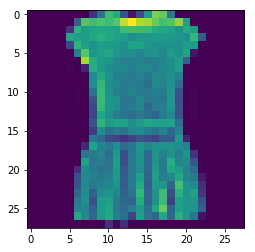

In [95]:
plt.imshow(train_images[3])